In [24]:
#libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import xgboost as xgb   #machine learning model based on random forest algorithm
from sklearn.metrics import mean_squared_error
#from sklearn.datasets import load_boston    #has tbeen removed
from sklearn.model_selection import train_test_split
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

### Import data in .csv format and change Format of Datetime

In [25]:
df = pd.read_csv('prc_Food_Germany_sorted.csv')
df = df.set_index('Datetime')
df.index = pd.to_datetime(df.index)

### First Training without Ukraine Confilct

In [26]:
df_cleaned = df.loc[df.index < '2021-11']

In [27]:
df_cleaned.head()

,FoodPriceIndex
Datetime,
1996-01-01,74.9
1996-02-01,75.5
1996-03-01,76.1
1996-04-01,76.4
1996-05-01,76.2


### Plot Data

<function matplotlib.pyplot.show(close=None, block=None)>

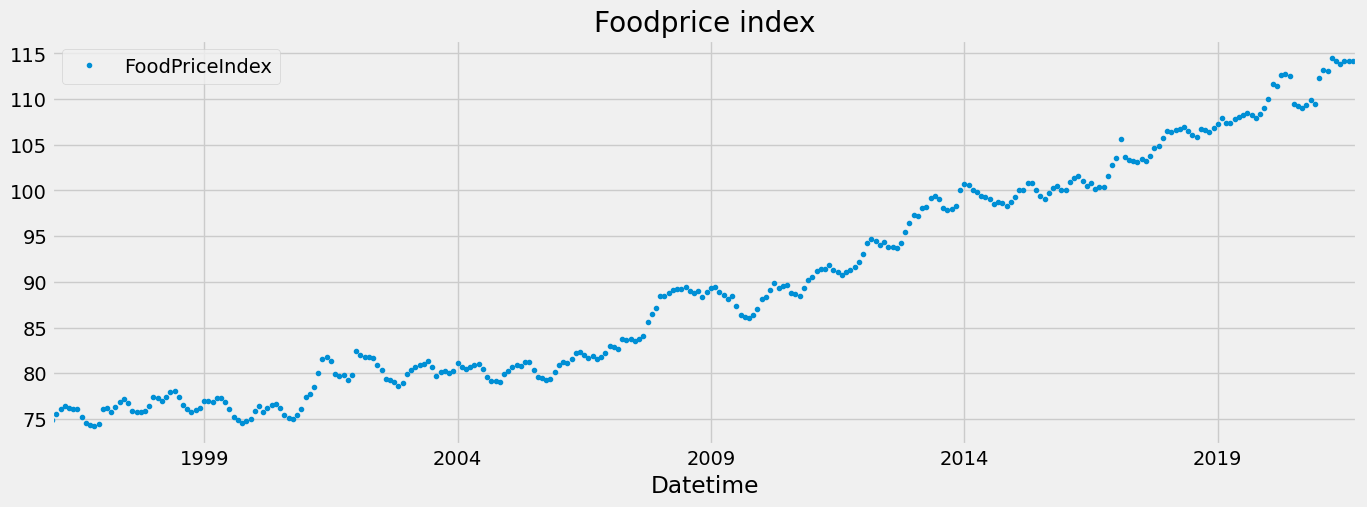

In [28]:
df_cleaned.plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='Foodprice index')
plt.show

## Train/Test Split

In [29]:
df_cleaned_diff = df_cleaned_diff_diff.diff()
df_cleaned_diff = df_cleaned_diff.dropna()

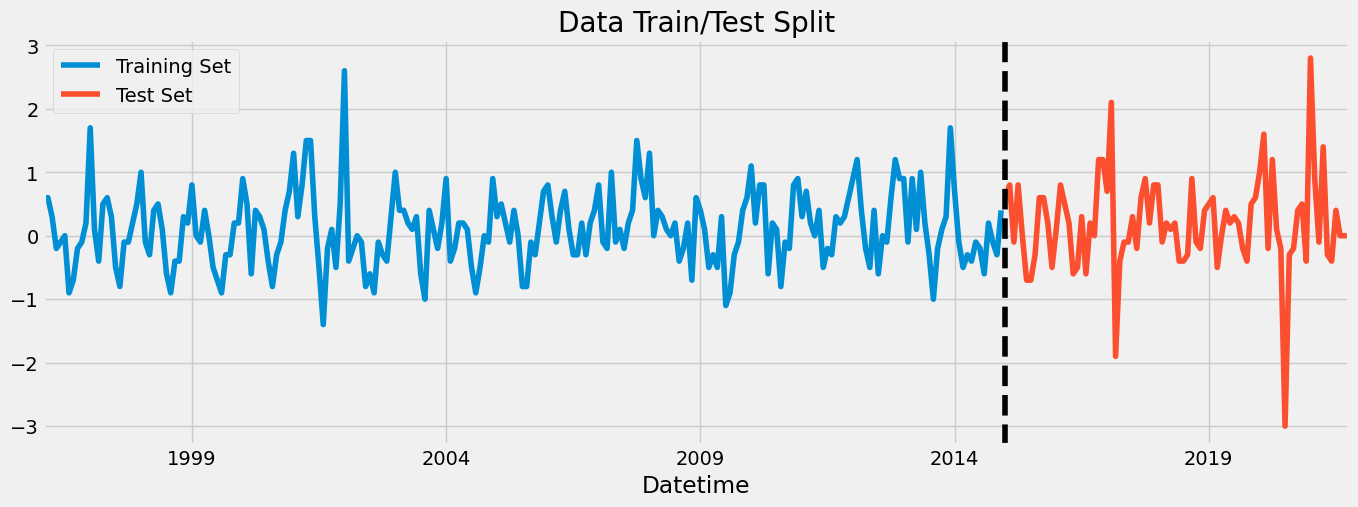

In [31]:
train = df_cleaned_diff.loc[df_cleaned_diff.index < '2015-01']
test = df_cleaned_diff.loc[df_cleaned_diff.index >= '2015-01']

fig, ax = plt.subplots(figsize=(15,5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('2015-01',color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()
           

### Feature Creation

In [ ]:
def create_features(df_cleaned_diff):
    """
    Create time series features based on time series index.

    """
    df_cleaned_diff = df_cleaned_diff.copy()
    df_cleaned_diff['Month'] = df_cleaned_diff.index.month
    df_cleaned_diff['Year'] = df_cleaned_diff.index.year
    df_cleaned_diff['Quarter'] = df_cleaned_diff.index.quarter
    #df_cleaned['MonthOfYear'] = df_cleaned.index.     gibts scheinbar nicht
    return df_cleaned

df_cleaned = create_features(df_cleaned)

### Make the data stationary by differentiating

In [ ]:
df_cleaned.plot()

### Create our model

In [ ]:
train = create_features(train)
test = create_features(test)

FEATURES = ['Month','Year','Quarter']
TARGET = 'FoodPriceIndex'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

### actually do the training

In [ ]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',                        #xgb basiert auf random forest, dauert ca. 23 sekunden ohne gpu, easy schnmeasy
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,                                                       #wenn validation rmse wieder wächst hat man wohl overfitting
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=20)

In [ ]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

In [ ]:
reg.predict(X_train)

In [ ]:
test2['prediction'] = reg.predict(X_test)
df_cleaned = df_cleaned.merge(test2[['prediction']], how='left',left_index=True, right_index=True)
ax = df_cleaned[['FoodPriceIndex']].plot(figsize=(15, 5))
df_cleaned['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()

In [ ]:
df_cleaned

In [ ]:
#dieser Block kompiliert irgendwie nur beim ersten mal. also einmal allen output löschen, 
#und dann nochmal alles ausführen
test['prediction'] = reg.predict(X_test)
df_cleaned = df_cleaned.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = df_cleaned[['FoodPriceIndex']].plot(figsize=(15, 5))
df_cleaned['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()